In [33]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_absolute_error

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('_bb386db860bf2eb4356cd71338367faf_Case_HousePrices-round1.csv', sep=';')
print(df.shape)
df.head()

(546, 13)


,obs,sell,lot,bdms,fb,sty,drv,rec,ffin,ghw,ca,gar,reg
0,1,42000,5850,3,1,2,1,0,1,0,0,1,0
1,2,38500,4000,2,1,1,1,0,0,0,0,0,0
2,3,49500,3060,3,1,1,1,0,0,0,0,0,0
3,4,60500,6650,3,1,2,1,1,0,0,0,0,0
4,5,61000,6360,2,1,1,1,0,0,0,0,0,0


In [4]:
df.isnull().sum()

obs     0
sell    0
lot     0
bdms    0
fb      0
sty     0
drv     0
rec     0
ffin    0
ghw     0
ca      0
gar     0
reg     0
dtype: int64

In [5]:
df.describe()

,obs,sell,lot,bdms,fb,sty,drv,rec,ffin,ghw,ca,gar,reg
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


* (a) Consider a linear model where the sale price of a house is the dependent variable and the explanatory variables
are the other variables given above. Perform a test for linearity. What do you conclude based on the test
result?

In [6]:
y = df['sell']
X = df.drop(columns=['obs', 'sell']) 

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()

# Resumo
print(model.summary())

reset_test = linear_reset(model, power=2, use_f=True)

print(reset_test)

                            OLS Regression Results                            
Dep. Variable:                   sell   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          6.18e-122
Time:                        13:03:12   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.2

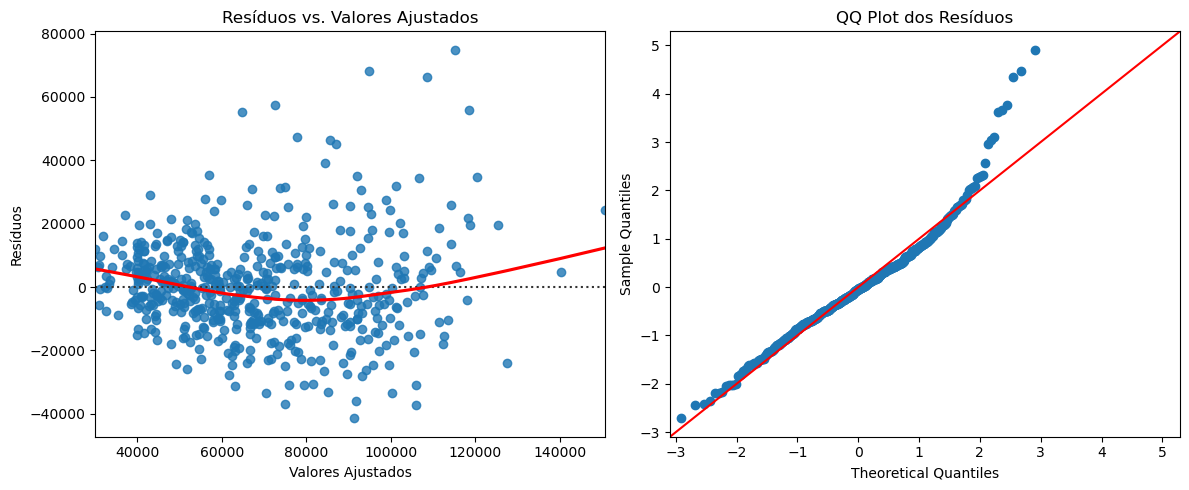

In [7]:
plt.figure(figsize=(12, 5))

# Resíduos vs. valores ajustados
plt.subplot(1, 2, 1)
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Valores Ajustados")

# QQ plot dos resíduos
plt.subplot(1, 2, 2)
sm.qqplot(model.resid, line='45', fit=True, ax=plt.gca())
plt.title("QQ Plot dos Resíduos")

plt.tight_layout()
plt.show()

* Com base no teste RESET de Ramsey (p-valor = 0.027) e no gráfico de resíduos mostrando um padrão curvo, rejeitamos a hipótese de linearidade. Portanto, há indícios de que o modelo linear simples não é apropriado — é recomendada alguma transformação nas variáveis (ex: log) ou inclusão de termos quadráticos.

* (b) Now consider a linear model where the log of the sale price of the house is the dependent variable and the
 explanatory variables are as before. Perform again the test for linearity. What do you conclude now?

In [8]:
df['LogSalePrice'] = np.log(df['sell'])
X = df.drop(columns=['obs', 'sell', 'LogSalePrice'])

X = sm.add_constant(X)
y = df['LogSalePrice']
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

reset_test = linear_reset(modelo, power=2, use_f=True)
print("Teste RESET de linearidade (Ramsey):")
print(reset_test)


                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          3.67e-123
Time:                        13:03:24   Log-Likelihood:                 73.873
No. Observations:                 546   AIC:                            -123.7
Df Residuals:                     534   BIC:                            -72.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0256      0.047    212.210      0.0

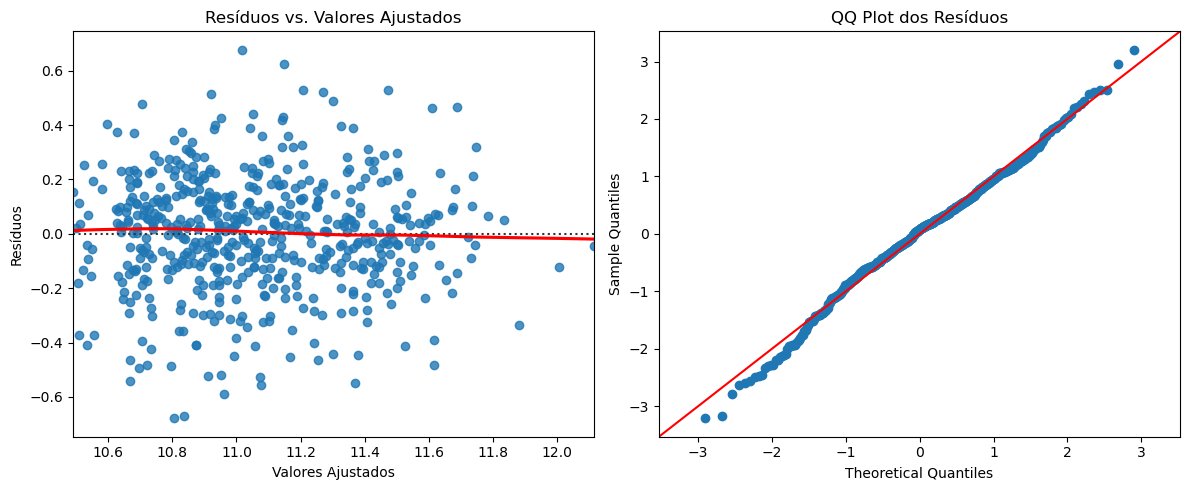

In [9]:
plt.figure(figsize=(12, 5))

# Resíduos vs. valores ajustados
plt.subplot(1, 2, 1)
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Valores Ajustados")

# QQ plot
plt.subplot(1, 2, 2)
sm.qqplot(modelo.resid, line='45', fit=True, ax=plt.gca())
plt.title("QQ Plot dos Resíduos")

plt.tight_layout()
plt.show()

* Com base no teste RESET de Ramsey (p-valor = 0.603) e no gráfico de resíduos mostrando um padrão mais linear, aceitamos a hipótese de linearidade. Portanto, há indícios de que o modelo linear simples com transformação nas variáveis (ex: log) melhora significamente a perfomance.

* (c) Continue with the linear model from question (b). Estimate a model that includes both the lot size variable
 and its logarithm, as well as all other explanatory variables without transformation. What is your conclusion,
 should we include lot size itself or its logarithm?

In [10]:
df.head()

,obs,sell,lot,bdms,fb,sty,drv,rec,ffin,ghw,ca,gar,reg,LogSalePrice
0,1,42000,5850,3,1,2,1,0,1,0,0,1,0,10.645425
1,2,38500,4000,2,1,1,1,0,0,0,0,0,0,10.558414
2,3,49500,3060,3,1,1,1,0,0,0,0,0,0,10.809728
3,4,60500,6650,3,1,2,1,1,0,0,0,0,0,11.010399
4,5,61000,6360,2,1,1,1,0,0,0,0,0,0,11.018629


In [11]:
df['LogLotArea'] = np.log(df['lot'])
X = df.drop(columns=['obs', 'sell', 'LogSalePrice'])

# Preparar X e y
X = sm.add_constant(X)
y = df['LogSalePrice']

# Ajustar modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     97.51
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          6.43e-126
Time:                        13:03:24   Log-Likelihood:                 82.843
No. Observations:                 546   AIC:                            -139.7
Df Residuals:                     533   BIC:                            -83.75
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1505      0.683     10.469      0.0

* p-valor da LotArea está a abaixo de (p > 0.05) e o da log(LotArea) está acima (p < 0.05), prefira o logaritmo.
* Por isso preferimos a variável sem o log

* (d) Consider now a model where the log of the sale price of the house is the dependent variable and the explanatory
 variables are the log transformation of lot size, with all other explanatory variables as before. We now consider
 interaction effects of the log lot size with the other variables. Construct these interaction variables. How many
 are individually significant?

In [12]:
df = df.dropna(subset=['sell', 'lot','bdms', 'fb', 'sty', 'drv', 'rec', 'ffin', 'ghw','ca', 'gar', 'reg'])
# Variáveis originais
variaveis = ['bdms', 'fb', 'sty', 'drv', 'rec', 'ffin', 'ghw','ca', 'gar', 'reg']

# Criar interações entre LogLotArea e as outras variáveis
for var in variaveis:
    df[f'LogLotArea_x_{var}'] = df['LogLotArea'] * df[var]

# Montar lista final de variáveis
X_vars = ['LogLotArea'] + variaveis + [f'LogLotArea_x_{var}' for var in variaveis]

# Ajustar modelo
X = sm.add_constant(df[X_vars])
y = df['LogSalePrice']
modelo = sm.OLS(y, X).fit()

# Exibir resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     56.89
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          2.26e-120
Time:                        13:03:25   Log-Likelihood:                 89.971
No. Observations:                 546   AIC:                            -135.9
Df Residuals:                     524   BIC:                            -41.28
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.9665      1.07

* Das 10 variáveis de interação construídas, apenas 1 é individualmente significativas. Portanto, há evidência de que o efeito de LogLotArea sobre o preço de venda depende dessas variáveis.

*  (e) Perform an F-test for the joint significance of the interaction effects from question (d).

In [13]:
df.head()

,obs,sell,lot,bdms,fb,sty,drv,rec,ffin,ghw,ca,gar,reg,LogSalePrice,LogLotArea,LogLotArea_x_bdms,LogLotArea_x_fb,LogLotArea_x_sty,LogLotArea_x_drv,LogLotArea_x_rec,LogLotArea_x_ffin,LogLotArea_x_ghw,LogLotArea_x_ca,LogLotArea_x_gar,LogLotArea_x_reg
0,1,42000,5850,3,1,2,1,0,1,0,0,1,0,10.645425,8.674197,26.022591,8.674197,17.348394,8.674197,0.000000,8.674197,0.0,0.0,8.674197,0.0
1,2,38500,4000,2,1,1,1,0,0,0,0,0,0,10.558414,8.294050,16.588099,8.294050,8.294050,8.294050,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,3,49500,3060,3,1,1,1,0,0,0,0,0,0,10.809728,8.026170,24.078511,8.026170,8.026170,8.026170,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,4,60500,6650,3,1,2,1,1,0,0,0,0,0,11.010399,8.802372,26.407116,8.802372,17.604744,8.802372,8.802372,0.000000,0.0,0.0,0.000000,0.0
4,5,61000,6360,2,1,1,1,0,0,0,0,0,0,11.018629,8.757784,17.515567,8.757784,8.757784,8.757784,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [14]:
# Criar log de preço e log da área do lote
df = df.dropna(subset=['sell', 'lot','bdms', 'fb', 'sty', 'drv', 'rec', 'ffin', 'ghw','ca', 'gar', 'reg'])

base_vars = ['bdms', 'fb', 'sty', 'drv', 'rec', 'ffin', 'ghw','ca', 'gar', 'reg']
inter_vars = [f'LogLotArea_x_{var}' for var in base_vars]

# Criar interações
for var in base_vars:
    df[f'LogLotArea_x_{var}'] = df['LogLotArea'] * df[var]

# Modelo reduzido (sem interações)
X_reduzido = sm.add_constant(df[['LogLotArea'] + base_vars])
modelo_reduzido = sm.OLS(df['LogSalePrice'], X_reduzido).fit()

print(modelo_reduzido.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          9.24e-127
Time:                        13:03:26   Log-Likelihood:                 82.412
No. Observations:                 546   AIC:                            -140.8
Df Residuals:                     534   BIC:                            -89.19
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7451      0.216     35.801      0.0

In [15]:
# Modelo completo (com interações)
X_completo = sm.add_constant(df[['LogLotArea'] + base_vars + inter_vars])
modelo_completo = sm.OLS(df['LogSalePrice'], X_completo).fit()

print(modelo_completo.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     56.89
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          2.26e-120
Time:                        13:03:26   Log-Likelihood:                 89.971
No. Observations:                 546   AIC:                            -135.9
Df Residuals:                     524   BIC:                            -41.28
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.9665      1.07

In [16]:
# F-test: comparação entre os dois modelos
anova_result = anova_lm(modelo_reduzido, modelo_completo)
print("Teste F para significância conjunta das interações:")
print(anova_result)

Teste F para significância conjunta das interações:
   df_resid        ssr  df_diff  ss_diff         F    Pr(>F)
0     534.0  23.638285      0.0      NaN       NaN       NaN
1     524.0  22.992735     10.0  0.64555  1.471195  0.146562


* p ≥ 0.05(p = 0.14): Não rejeitamos H₀ → As interações não têm efeito significativo conjunto.

* (f) Now perform model specification on the interaction variables using the general-to-specific approach. (Only
 eliminate the interaction effects.)

In [17]:
variaveis_base = ['bdms', 'fb', 'sty', 'drv', 'rec', 'ffin', 'ghw','ca', 'gar', 'reg']
interacoes = [f'LogLotArea_x_{var}' for var in variaveis_base]

variaveis_modelo = ['LogLotArea'] + variaveis_base + interacoes


df_temp = df.copy()
continuar = True

while continuar:
    X = sm.add_constant(df_temp[variaveis_modelo])
    y = df_temp['LogSalePrice']
    modelo = sm.OLS(y, X).fit()

    # Filtrar apenas interações com p-valor > 0.05
    pvals = modelo.pvalues.filter(like='LogLotArea_x_')
    if pvals.empty or (pvals > 0.05).sum() == 0:
        continuar = False
    else:
        # Remove a interação com o maior p-valor
        var_remover = pvals.idxmax()
        print(f"Removendo: {var_remover} (p-valor = {pvals.max():.4f})")
        variaveis_modelo.remove(var_remover)

# Mostrar modelo final
print(modelo.summary())

Removendo: LogLotArea_x_reg (p-valor = 0.9784)
Removendo: LogLotArea_x_bdms (p-valor = 0.9582)
Removendo: LogLotArea_x_ffin (p-valor = 0.7434)
Removendo: LogLotArea_x_ghw (p-valor = 0.4370)
Removendo: LogLotArea_x_ca (p-valor = 0.3017)
Removendo: LogLotArea_x_gar (p-valor = 0.2448)
Removendo: LogLotArea_x_fb (p-valor = 0.1872)
Removendo: LogLotArea_x_sty (p-valor = 0.2906)
Removendo: LogLotArea_x_drv (p-valor = 0.0502)
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     98.59
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          8.71e-127
Time:                        13:03:27   Log-Likelihood:                 84.909
No. Observations:                 546   AIC:                            -143.8
Df Residuals:           

In [18]:
df.columns

Index(['obs', 'sell', 'lot', 'bdms', 'fb', 'sty', 'drv', 'rec', 'ffin', 'ghw',
       'ca', 'gar', 'reg', 'LogSalePrice', 'LogLotArea', 'LogLotArea_x_bdms',
       'LogLotArea_x_fb', 'LogLotArea_x_sty', 'LogLotArea_x_drv',
       'LogLotArea_x_rec', 'LogLotArea_x_ffin', 'LogLotArea_x_ghw',
       'LogLotArea_x_ca', 'LogLotArea_x_gar', 'LogLotArea_x_reg'],
      dtype='object')

* Após aplicar a abordagem geral para específica, apenas as interações entre LogLotArea (LogLotArea_x_rec) e as variáveis (bdms, fb, sty, drv, rec, ffin, ghw, 'c','ga','re ) permaneceram no modelo, indicando que apenas essas possuem efeito estatisticamente significativo.

*  (g) One may argue that some of the explanatory variables are endogenous and that there may be omitted variables.
 For example, the ‘condition’ of the house in terms of how it is maintained is not a variable (and difficult to
 measure) but will affect the house price. It will also affect, or be reflected in, some of the other variables, such
 as whether the house has an air conditioning (which is mostly in newer houses). If the condition of the house
 is missing, will the effect of air conditioning on the (log of the) sale price be over- or underestimated? (For
 this question no computer calculations are required.)

In [19]:
df = df.rename(columns={
    'sell': 'SalePrice',
    'lot': 'LotArea',
    'bdms': 'Bedrooms',
    'fb': 'FullBath',
    'sty': 'Stories',
    'drv': 'Driveway',
    'rec': 'RecreationRoom',
    'ffin': 'FinishedBasement',
    'ghw': 'GasHotWater',
    'ca': 'CentralAir',
    'gar': 'Garage',
    'reg': 'PreferredNeighborhood',
    'obs': 'Obs'
})

In [20]:
# 1. Matriz de correlação entre CentralAir e proxies do estado
correlation_matrix = df[['CentralAir', 'PreferredNeighborhood', 'Garage', 'Stories', 'FullBath', 'FinishedBasement']].corr()
print("Correlação entre CentralAir e proxies do estado da casa:\n")
print(correlation_matrix['CentralAir'])

Correlação entre CentralAir e proxies do estado da casa:

CentralAir               1.000000
PreferredNeighborhood    0.115626
Garage                   0.156596
Stories                  0.296216
FullBath                 0.184955
FinishedBasement         0.045248
Name: CentralAir, dtype: float64


In [21]:
# 2. Regressão auxiliar: CentralAir ~ proxies do estado
X_proxy = sm.add_constant(df[['PreferredNeighborhood', 'Garage', 'Stories', 'FullBath', 'FinishedBasement']])
y_proxy = df['CentralAir']
modelo_proxy = sm.OLS(y_proxy, X_proxy).fit()
print("\nRegressão auxiliar (CentralAir ~ proxies do estado):\n")
print(modelo_proxy.summary())


Regressão auxiliar (CentralAir ~ proxies do estado):

                            OLS Regression Results                            
Dep. Variable:             CentralAir   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     15.39
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           3.69e-14
Time:                        13:03:28   Log-Likelihood:                -320.58
No. Observations:                 546   AIC:                             653.2
Df Residuals:                     540   BIC:                             679.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [22]:
# 3. Modelos com e sem CentralAir
# Modelo COM CentralAir
X_com_ca = sm.add_constant(df[['CentralAir', 'PreferredNeighborhood', 'Garage', 'Stories', 'FullBath', 'FinishedBasement', 'LogLotArea']])
modelo_com_ca = sm.OLS(df['LogSalePrice'], X_com_ca).fit()
print("\nModelo com CentralAir:\n")
print(modelo_com_ca.summary())


Modelo com CentralAir:

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     150.9
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          1.61e-122
Time:                        13:03:29   Log-Likelihood:                 62.262
No. Observations:                 546   AIC:                            -108.5
Df Residuals:                     538   BIC:                            -74.10
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const

In [23]:
# Modelo SEM CentralAir
X_sem_ca = sm.add_constant(df[['PreferredNeighborhood', 'Garage', 'Stories', 'FullBath', 'FinishedBasement', 'LogLotArea']])
modelo_sem_ca = sm.OLS(df['LogSalePrice'], X_sem_ca).fit()
print("\nModelo sem CentralAir:\n")
print(modelo_sem_ca.summary())


Modelo sem CentralAir:

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     153.7
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          2.82e-113
Time:                        13:03:29   Log-Likelihood:                 37.941
No. Observations:                 546   AIC:                            -61.88
Df Residuals:                     539   BIC:                            -31.76
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const

* A inclusão de CentralAir aumenta o R² ajustado e seu coeficiente é positivo e altamente significativo.
* Mas como CentralAir está correlacionada com variáveis omitidas (ex: estado da casa), esse coeficiente está provavelmente superestimado.

* (h) Finally we analyze the predictive ability of the model. Consider again the model where the log of the sale price
 of the house is the dependent variable and the explanatory variables are the log transformation of lot size, with
 all other explanatory variables in their original form (and no interaction effects). Estimate the parameters of
 the model using the first 400 observations. Make predictions on the log of the price and calculate the MAE for
 the other 146 observations. How good is the predictive power of the model (relative to the variability in the
 log of the price)?

In [25]:
df.head()

,Obs,SalePrice,LotArea,Bedrooms,FullBath,Stories,Driveway,RecreationRoom,FinishedBasement,GasHotWater,CentralAir,Garage,PreferredNeighborhood,LogSalePrice,LogLotArea,LogLotArea_x_bdms,LogLotArea_x_fb,LogLotArea_x_sty,LogLotArea_x_drv,LogLotArea_x_rec,LogLotArea_x_ffin,LogLotArea_x_ghw,LogLotArea_x_ca,LogLotArea_x_gar,LogLotArea_x_reg
0,1,42000,5850,3,1,2,1,0,1,0,0,1,0,10.645425,8.674197,26.022591,8.674197,17.348394,8.674197,0.000000,8.674197,0.0,0.0,8.674197,0.0
1,2,38500,4000,2,1,1,1,0,0,0,0,0,0,10.558414,8.294050,16.588099,8.294050,8.294050,8.294050,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,3,49500,3060,3,1,1,1,0,0,0,0,0,0,10.809728,8.026170,24.078511,8.026170,8.026170,8.026170,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,4,60500,6650,3,1,2,1,1,0,0,0,0,0,11.010399,8.802372,26.407116,8.802372,17.604744,8.802372,8.802372,0.000000,0.0,0.0,0.000000,0.0
4,5,61000,6360,2,1,1,1,0,0,0,0,0,0,11.018629,8.757784,17.515567,8.757784,8.757784,8.757784,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [35]:
X = df[['LogLotArea', 'Bedrooms', 'FullBath', 'Stories', 'Driveway', 'RecreationRoom', 'FinishedBasement', 'GasHotWater', 'CentralAir', 'Garage', 'PreferredNeighborhood']]
y = df['LogSalePrice']

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

X_train = X.iloc[:400]
y_train = y.iloc[:400]
X_test = X.iloc[400:]
y_test = y.iloc[400:]

# Ajustar o modelo de regressão linear
model = sm.OLS(y_train, X_train).fit()
# Exibir resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     71.77
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           1.97e-86
Time:                        13:23:00   Log-Likelihood:                 37.323
No. Observations:                 400   AIC:                            -50.65
Df Residuals:                     388   BIC:                            -2.749
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.67

In [36]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'\nMAE (Mean Absolute Error): {mae:.4f}')

# Variabilidade do log(sell) no conjunto de teste
std_log_sell = y_test.std()
print(f'Desvio padrão de log(sell) no conjunto de teste: {std_log_sell:.4f}')

# Comparar MAE com a variabilidade
print(f'MAE / Desvio padrão: {mae / std_log_sell:.4f}')


MAE (Mean Absolute Error): 0.1278
Desvio padrão de log(sell) no conjunto de teste: 0.2888
MAE / Desvio padrão: 0.4427


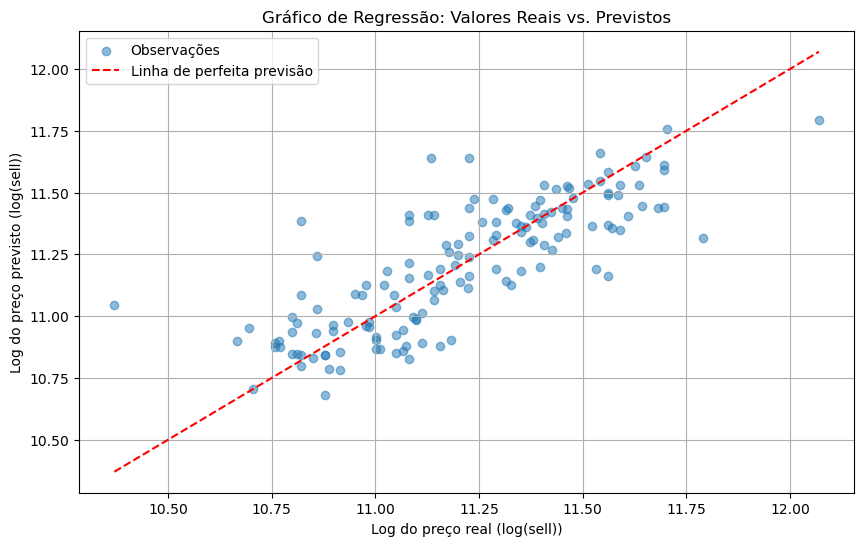

In [37]:
# Gráfico de regressão: Valores reais vs. previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Observações')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Linha de perfeita previsão')
plt.xlabel('Log do preço real (log(sell))')
plt.ylabel('Log do preço previsto (log(sell))')
plt.title('Gráfico de Regressão: Valores Reais vs. Previstos')
plt.legend()
plt.grid(True)
plt.show()

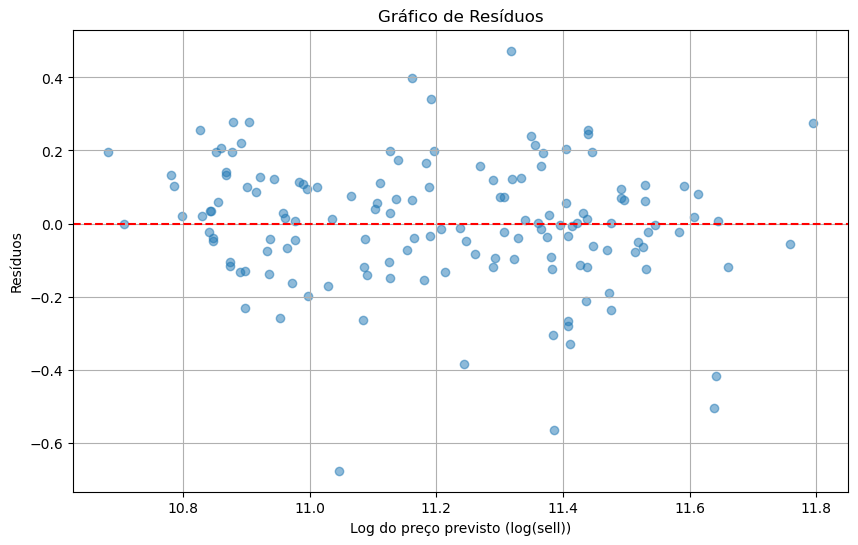

In [38]:
# Gráfico de resíduos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Log do preço previsto (log(sell))')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.grid(True)
plt.show()